<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.166735,58.046139,0.001335,141.214210,141.213168,0.001042
1,0.0,1.0,60.592175,85.492196,-0.000987,156.083384,156.084465,-0.001081
2,0.0,2.0,95.317691,67.831605,-0.000414,173.148882,173.150074,-0.001191
3,0.0,3.0,99.420067,41.030202,0.002826,150.453095,150.451072,0.002023
4,0.0,4.0,47.856483,27.722772,-0.001050,85.578205,85.578952,-0.000747
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.811836,96.711941,-0.000241,151.523536,151.523869,-0.000333
249996,999.0,246.0,32.914753,64.740068,0.000348,107.655170,107.654950,0.000220
249997,999.0,247.0,66.938313,98.229318,-0.000807,175.166823,175.167650,-0.000826
249998,999.0,248.0,37.759495,44.542322,-0.003008,92.298809,92.301928,-0.003119


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.166735,58.046139,0.001335,141.214210,141.213168,0.001042
1,0.0,1.0,60.592175,85.492196,-0.000987,156.083384,156.084465,-0.001081
2,0.0,2.0,95.317691,67.831605,-0.000414,173.148882,173.150074,-0.001191
3,0.0,3.0,99.420067,41.030202,0.002826,150.453095,150.451072,0.002023
4,0.0,4.0,47.856483,27.722772,-0.001050,85.578205,85.578952,-0.000747
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,44.811836,96.711941,-0.000241,151.523536,151.523869,-0.000333
249996,999.0,246.0,32.914753,64.740068,0.000348,107.655170,107.654950,0.000220
249997,999.0,247.0,66.938313,98.229318,-0.000807,175.166823,175.167650,-0.000826
249998,999.0,248.0,37.759495,44.542322,-0.003008,92.298809,92.301928,-0.003119


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    73.166735  58.046139  0.001335  141.214210  141.213168  0.001042
      1.0    60.592175  85.492196 -0.000987  156.083384  156.084465 -0.001081
      2.0    95.317691  67.831605 -0.000414  173.148882  173.150074 -0.001191
      3.0    99.420067  41.030202  0.002826  150.453095  150.451072  0.002023
      4.0    47.856483  27.722772 -0.001050   85.578205   85.578952 -0.000747
...                ...        ...       ...         ...         ...       ...
999.0 245.0  44.811836  96.711941 -0.000241  151.523536  151.523869 -0.000333
      246.0  32.914753  64.740068  0.000348  107.655170  107.654950  0.000220
      247.0  66.938313  98.229318 -0.000807  175.166823  175.167650 -0.000826
      248.0  37.759495  44.542322 -0.003008   92.298809   92.301928 -0.003119
      249.0  86.532590  92.298847 -0.000374  188.831063  188.831391 -0.000328

[250000 rows x 6 columns]

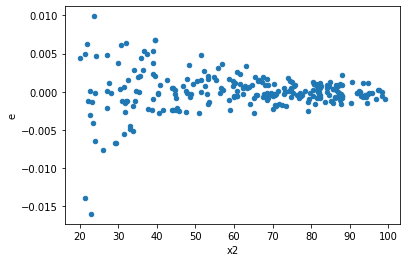

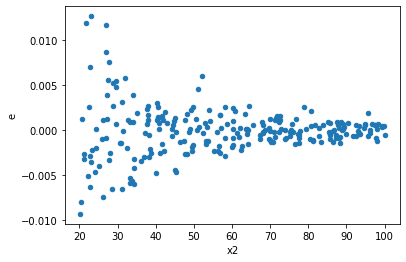

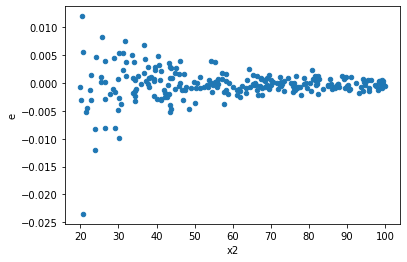

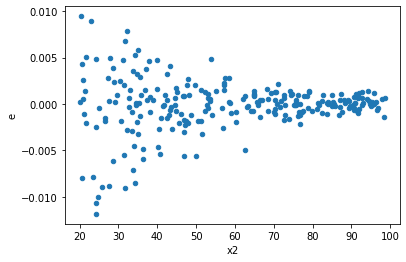

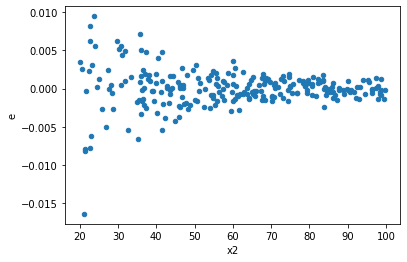

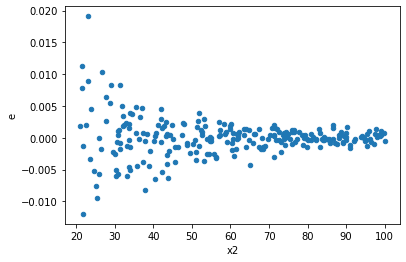

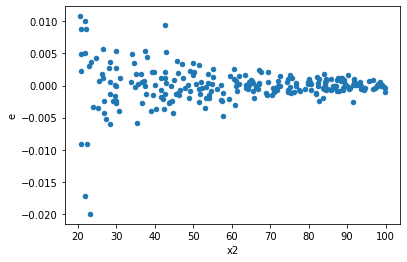

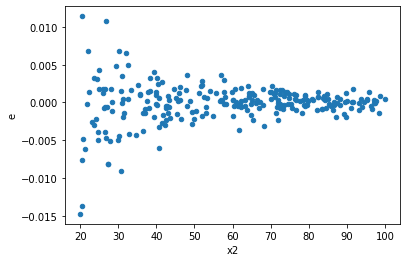

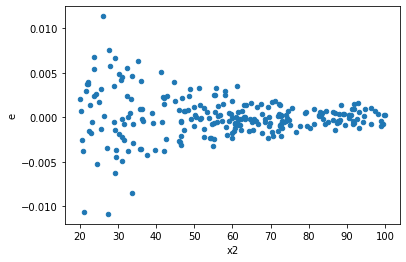

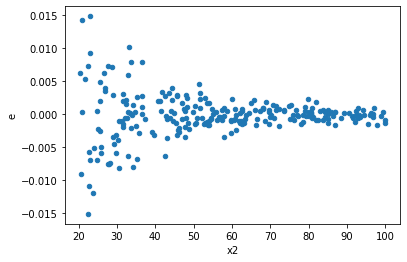

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,144.0,102.0,0.00064416739563582,0.001267376491582335,4.473384691915416e-06,1.2425259721395441e-05,2.7775969600493235,1.1405764932526097e-07,0.9999999429711753,5.7028824662630484e-08,Reject005=0 : Heteroscedasticity
9.0,143.0,103.0,0.0003523231299998762,0.0016533979174023425,2.463798111887246e-06,1.6052406965071287e-05,6.515309386602012,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,116.0,130.0,0.0003050526292535207,0.0015433596297750537,2.6297640452889718e-06,1.1871997152115799e-05,4.514472381422815,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
13.0,132.0,114.0,0.0003438561638239245,0.0016732788213790178,2.604970938060034e-06,1.467788439806156e-05,5.634567427839494,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,123.0,123.0,0.0002784378823367237,0.0012810083093580064,2.26372262062377e-06,1.0414701702097612e-05,4.6006969260340895,6.661338147750939e-16,0.9999999999999997,3.3306690738754696e-16,Reject005=0 : Heteroscedasticity
18.0,118.0,128.0,0.00025377622904269013,0.0012689605471120846,2.150646008836357e-06,9.91375427431316e-06,4.609663437674321,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
19.0,116.0,130.0,0.0002880598274379763,0.0025233961114526585,2.483274374465313e-06,1.9410739318866604e-05,7.81659067498171,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
22.0,103.0,143.0,0.00015552459487287645,0.0017826242734834909,1.5099475230376354e-06,1.2465904010374063e-05,8.255852485055767,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
28.0,99.0,147.0,0.00015212703239683096,0.0018148528612753837,1.5366366908770803e-06,1.2345937831805332e-05,8.034389589356042,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,119.0,0.0014274978247853592,0.0002503114327567593,1.1240140352640623e-05,2.103457418124028e-06,0.1871380029191421,7.168646892368017e-19,Reject005=0 : Heteroscedasticity
1.0,116.0,130.0,0.0014293205152981934,0.0003738188200678316,1.232172858015684e-05,2.8755293851371664e-06,0.23337061569169582,2.426249929144101e-14,Reject005=0 : Heteroscedasticity
2.0,125.0,121.0,0.0014065129882217284,0.0002506978101337244,1.1252103905773827e-05,2.0718827283778877e-06,0.18413291822827338,4.789241994664655e-19,Reject005=0 : Heteroscedasticity
3.0,139.0,107.0,0.001692652061250775,0.00018318790419801629,1.2177352958638669e-05,1.7120364878319278e-06,0.14059184238536843,1.6925076246205963e-25,Reject005=0 : Heteroscedasticity
4.0,144.0,102.0,0.00064416739563582,0.001267376491582335,4.473384691915416e-06,1.2425259721395441e-05,2.7775969600493235,1.1405764932526097e-07,Reject005=0 : Heteroscedasticity
5.0,121.0,125.0,0.0019084127695128924,0.000532537518107641,1.577200635961068e-05,4.260300144861128e-06,0.2701178307771295,2.884245285035793e-12,Reject005=0 : Heteroscedasticity
6.0,113.0,133.0,0.0014565029788587787,0.0003780606367566922,1.2889406892555563e-05,2.8425611786217456e-06,0.22053467644531435,4.4967266373271805e-15,Reject005=0 : Heteroscedasticity
7.0,133.0,113.0,0.0012729633223940646,0.0003079736413622772,9.571152799955372e-06,2.7254304545334265e-06,0.28475466973488656,8.368269470300951e-12,Reject005=0 : Heteroscedasticity
8.0,86.0,160.0,0.00115059590012517,0.0006483907387562482,1.3379022094478721e-05,4.052442117226551e-06,0.3028952406692654,6.614146058052918e-09,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64